# PAM (Partition Around Medoids)

## Algorithm
> 1. Given `k`
2. Randomly pick `k` instances as initial medoids
3. Assign each data point to the nearest medoid `x`
4. Calculate the objective function
	- the sum of dissimilarities of all points to their 
	nearest medoids. (squared-error criterion)
5. Randomly select an point `y`
6. Swap `x` by `y` if the swap reduces the objective function
7. Repeat (3-6) until no change. 

In [137]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from tqdm import tqdm

In [160]:
class PAM:
    """
    Partition Around Medoids Algorithm
    """
    
    def __init__(self, X: ndarray, k: int=3):
        self.k = k
        self.X = X
        
    def fit(self):
        self.n_samples, self.n_features = self.X.shape
        
        # initialize the cluster medoids randomly
        self.medoids: ndarray = self.X[np.random.choice(self.n_samples, size=self.k, replace=False)]
        
        while True:
            # assign all the points to its nearest medoid
            distances: ndarray = np.zeros((self.n_samples, self.k))
            
            for i in range(self.k):
                distances[:, i] = np.linalg.norm(self.X - self.medoids[i], axis=1)
            
            # cluster labels of the each row in the data
            self.labels: ndarray = np.argmin(distances, axis=1)
            
            prev_cost = self.cost_function(self.medoids, self.labels)
            
            # update the medoids
            new_medoids = np.copy(self.medoids)
            new_medoid_y = self.X[np.random.choice(self.n_samples, size=1, replace=False)]
            new_medoids[np.random.choice(new_medoids.shape[0])] = new_medoid_y
            
            new_distances: ndarray = np.zeros((self.n_samples, self.k))
            
            for i in range(self.k):
                new_distances[:, i] = np.linalg.norm(self.X - new_medoids[i], axis=1)
            
            # cluster labels of the each row in the data
            new_labels: ndarray = np.argmin(new_distances, axis=1)
            
            new_cost = self.cost_function(new_medoids, new_labels)
            
            # check if the centroids are not improving then stop
            if np.allclose(self.medoids, new_medoids):
                break
            
            if new_cost < prev_cost:
                self.medoids = new_medoids
                self.labels = new_labels
                         
            
    def cost_function(self, medoids_: ndarray, labels_: ndarray):
        """ Cost function """
        return np.sum(
            [np.sum(np.linalg.norm(self.X[labels_ == i] - medoids_[i], axis=1)) for i in range(self.k)]
        )
    
    def xb(self):
        """ Xie Beni Index """
        
        diff = self.medoids[:, np.newaxis, :] - self.medoids[np.newaxis, :, :]
        dist_matrix = np.tril(np.sqrt(np.sum(np.power(diff, 2), axis=2)))
        min_value = np.min(dist_matrix[np.nonzero(dist_matrix)])
        result = self.cost_function(self.medoids, self.labels) / (self.n_samples * min_value)
        return result

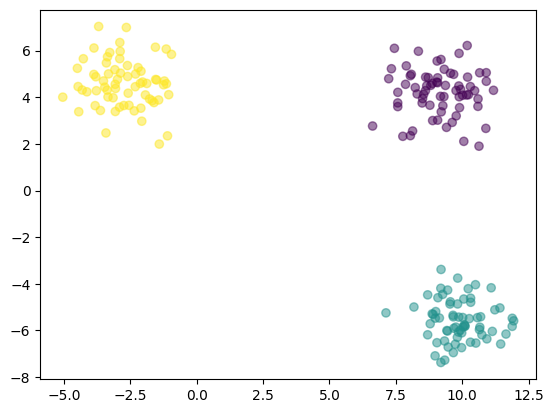

In [10]:
X, labels = make_blobs(n_samples=200, n_features=2, centers=3, random_state=24)

plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5)
plt.show()

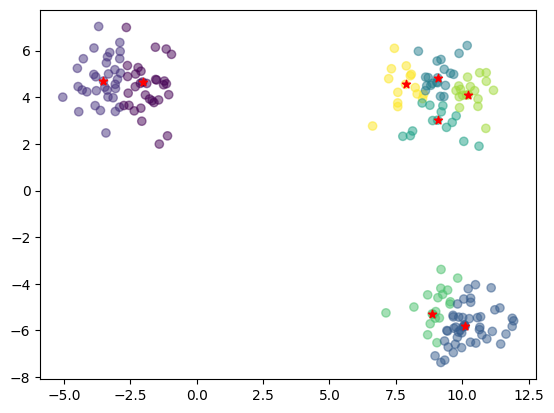

In [154]:
pam = PAM(X, k=8)
pam.fit()

labels = pam.labels
medoids = pam.medoids


# plot the final result
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5)
plt.scatter(medoids[:, 0], medoids[:, 1], c="red", marker="*")
plt.show()

In [155]:
js = []
for i in tqdm(range(2, int(np.ceil(np.sqrt(X.shape[0]))))):
    pam = PAM(X, k=i)
    pam.fit()
    js.append(pam.cost_function(pam.medoids, pam.labels))
    
print(js)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:13<00:00,  1.01s/it]

[764.1662311154281, 256.28014876683284, 317.5124630960348, 239.8233775206388, 203.4900185284647, 178.2065225689133, 174.22166552321846, 164.90722540935556, 154.27018461230463, 156.15403944097952, 141.70954985120133, 139.31957872826888, 134.0861799324527]


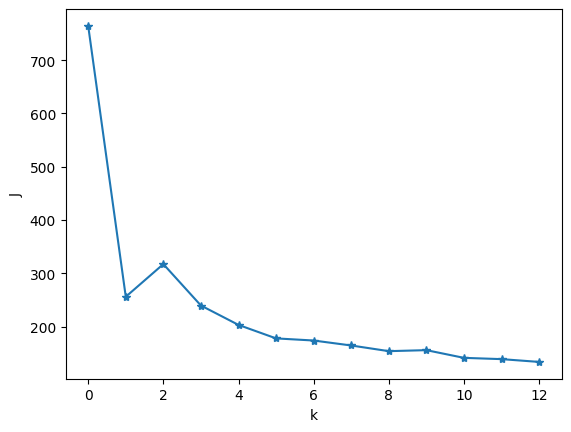

In [156]:
plt.plot(range(len(js)), js, "-*")
plt.xlabel("k")
plt.ylabel("J")

plt.show()

In [161]:
xbs = []
for i in tqdm(range(2, int(np.ceil(np.sqrt(X.shape[0]))))):
    pam = PAM(X, k=i)
    pam.fit()
    xbs.append(pam.xb())
    
print(xbs)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:18<00:00,  1.39s/it]

[0.2658716843648827, 0.12270453209907792, 0.8013011679441203, 1.5527851520323386, 0.5948592975181963, 0.737129475106164, 0.6380841235882796, 0.7670155076325446, 1.1021826063846079, 0.7471385580801081, 0.9749037270476046, 0.7701241385754222, 1.1599637057682248]


In [162]:
print(f"The value of the k is using XB index is: {2 + np.argmin(xbs)}")

The value of the k is using XB index is: 3


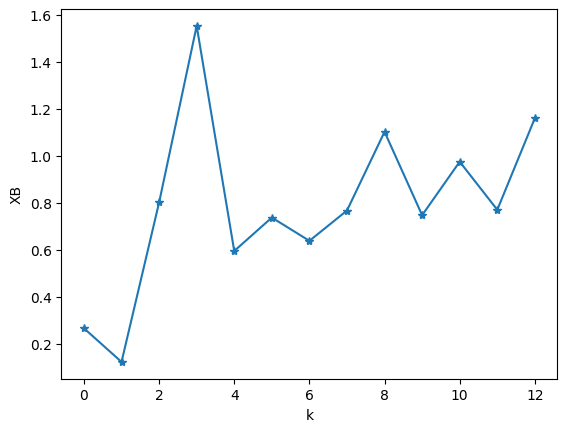

In [163]:
plt.plot(range(len(xbs)), xbs, "-*")
plt.xlabel("k")
plt.ylabel("XB")

plt.show()